In [113]:
#titration plots for different solutions


from phreeqpython import PhreeqPython

import numpy as np


from matplotlib import pyplot as plt

import pandas as  pd




In [114]:
# some unecessary style settings

plt.rcParams.update({'font.size': 22,
                     #font.weight':'bold',
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'lines.linewidth' :  4,
                     'axes.labelsize'  : 20.0,
                     'axes.titlesize':  20,
                     'figure.titlesize': 'x-large',
                     'legend.fontsize': 18.0,})



In [120]:
#produce a solution with NaOH one in equilibrium with atmophere and the other one pure


# use the vitens database for all constants

# create new PhreeqPython instance
pp = PhreeqPython(database='vitens.dat')

#for differnt NaOH doses

temp=25

c=50


solution1=pp.add_solution_simple({'NaOH':c},temperature=temp, units='mmol')


#concentration CO2
p=415 # ppm

#partial pressure pCO2 in atm
pCO2=p*1e-6 


#phreeqc always uses log10 values
input_pCO2=np.log10(pCO2)
    
    
# equalize solution with CO2
# equilibrium with atmosphere
solution1.equalize(['CO2(g)'], [input_pCO2])


solution2=pp.add_solution_simple({'NaOH':c},temperature=temp, units='mmol')





In [121]:
solution1.pH

9.545214784344187

In [122]:
solution2.pH

12.6037386580576

In [123]:
# add acid stepwise 


pH_s1=[]

pH_s2=[]

acid_s1=[]

acid_s2=[]

for acid in range(600):
    
    pH_s1.append(solution1.pH)
    
    pH_s2.append(solution2.pH)

    acid_s1.append(acid*0.1)

    acid_s2.append(acid*0.1)

    solution1.add('HCl',0.1, 'mmol') # add 1 mmol of 
    solution2.add('HCl',0.1, 'mmol') # add 1 mmol of 
    
    


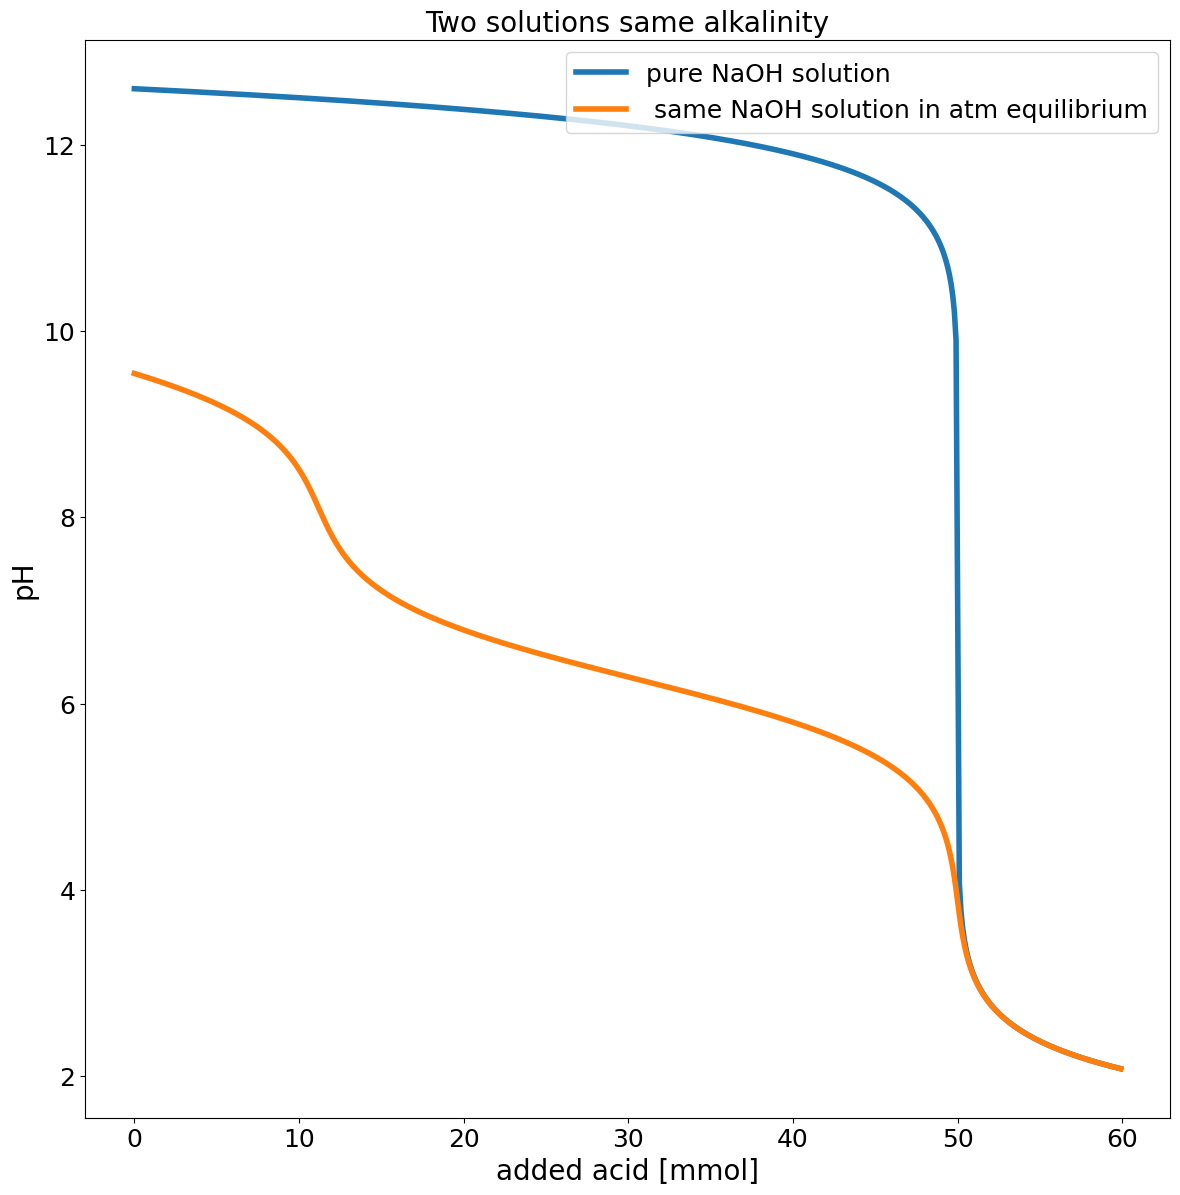

In [127]:
fig = plt.figure(figsize=[14,14])

plt.plot(acid_s2,pH_s2, label='pure NaOH solution')

plt.plot(acid_s1,pH_s1, label=' same NaOH solution in atm equilibrium')



plt.ylabel('pH')

plt.xlabel('added acid [mmol]')

plt.legend(loc='upper right')

plt.title('Two solutions same alkalinity')


plt.savefig('titration-plot.pdf')  